

## RFM Analysis

Customer Analytics is important to run a successful business.  The role of customer analytics in an organization is important to: 
1. Understand customer needs and tailoring product offerings to those needs.
2. Use analytics to provide innovative experiences for their customers.

In this project, we focus on RFM analysis. This type of analysis is used when historical data for existing customers is available. RFM Analysis identifies existing customers who are most likely to remain loyal to a company or respond to a new product. RFM analysis allows you to create customized and personalized messaging, and this can be used to streamline the various messages you send to a specific customer and continue sending messages of only a particular type, thereby reducing the chance of dissatisfaction or annoyance, and create higher customer satisfaction. RFM is a model based on historical data and helps forecast future behavior based on past interactions. The RFM Model of customer value uses proven marketing principles to help businesses differentiate between marketing to existing and new users and helps them create relevantly and personalized messaging by understanding user behavior. The model allows the business to segment its users based on three criteria based on an existing customer’s transaction history, namely:

1. The recency of Customer's Last purchase 
2. Frequency of purchases 
3. Total amount spent, which is referred to as monetary

The RFM model, when used in conjunction with traditional models of segmentation, can help businesses visualize new and existing customers differently, and create favorable conditions to maximize customer lifetime value.

## Business Problem 


How do we segment our customers to reach them effectively through target marketing?

By applying the paraeto principle to a customer database,  80% of a company's revenue comes from 20% of the customers. RFM helps determine who the top 20% of customers are and groups the remaining customers into other segments such as price-sensitive, potentially loyal, brand sensitive, etc. This ensures that each customer is better targeted and convert the other segments into the higher value segments and increase customer lifetime value. 

In this project, the customer sales data from January 2011 to May 2011 of an E-commerce store is analyzed to group customers from the United Kingdom into segments using the RFM model. The relevant libraries and the dataset is imported into the python environment. 

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None);
pd.set_option("display.max_rows",None);

#load data
retail=pd.read_csv("data.csv", encoding= 'unicode_escape')


In [93]:
df=retail.copy()
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,540558,21258,?,-29,1/10/2011 10:04,0.00,NaN,United Kingdom
1,540560,21589,NaN,-14,1/10/2011 10:08,0.00,NaN,United Kingdom
2,540561,22343,PARTY PIZZA DISH RED RETROSPOT,24,1/10/2011 10:32,0.21,13004.0,United Kingdom
3,540561,22344,PARTY PIZZA DISH PINK POLKADOT,24,1/10/2011 10:32,0.21,13004.0,United Kingdom
4,540561,47504H,ENGLISH ROSE SPIRIT LEVEL,24,1/10/2011 10:32,0.85,13004.0,United Kingdom


<b>Data cleaning and Manipulation</b>

The date column in the dataset is standardized and we take a closer look at the data to identify key information about the dataset.

In [94]:
# Convert InvoiceDate from object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#creating a total sales column
df["Totalsum"] = df['Quantity'] * df['UnitPrice']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290603 entries, 0 to 290602
Data columns (total 9 columns):
InvoiceNo      290603 non-null object
StockCode      290603 non-null object
Description    289806 non-null object
Quantity       290603 non-null int64
InvoiceDate    290603 non-null datetime64[ns]
UnitPrice      290603 non-null float64
CustomerID     214539 non-null float64
Country        290603 non-null object
Totalsum       290603 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.0+ MB


In [95]:
# information about the data set
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(df[df.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))


290,603 rows; 9 columns
76,064 transactions don't have a customer id
Transactions timeframe from 2011-01-04 10:00:00 to 2011-12-09 12:49:00


In [105]:
#Eliminating NA rows in Cstomer ID

df=df[df.notnull().all(axis=1)] #eliminating NA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214539 entries, 2 to 290602
Data columns (total 9 columns):
InvoiceNo      214539 non-null object
StockCode      214539 non-null object
Description    214539 non-null object
Quantity       214539 non-null int64
InvoiceDate    214539 non-null datetime64[ns]
UnitPrice      214539 non-null float64
CustomerID     214539 non-null float64
Country        214539 non-null object
Totalsum       214539 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 16.4+ MB


In [106]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsum
2,540561,22343,PARTY PIZZA DISH RED RETROSPOT,24,2011-01-10 10:32:00,0.21,13004.0,United Kingdom,5.04
3,540561,22344,PARTY PIZZA DISH PINK POLKADOT,24,2011-01-10 10:32:00,0.21,13004.0,United Kingdom,5.04
4,540561,47504H,ENGLISH ROSE SPIRIT LEVEL,24,2011-01-10 10:32:00,0.85,13004.0,United Kingdom,20.40
5,540561,84509G,SET OF 4 FAIRY CAKE PLACEMATS,12,2011-01-10 10:32:00,1.25,13004.0,United Kingdom,15.00
6,540561,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2011-01-10 10:32:00,4.95,13004.0,United Kingdom,14.85


The customer records are grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. 

### Recency Scores

To calculate recency, a snapshot date is created. This date is one day after the most recent invoice date of the data set. The date difference is used to show the recency of the purchase.

In [107]:
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)  # set current date as most recent date plus one day
rec_df = snapshot_date-df.groupby("CustomerID").agg({"InvoiceDate":max}) 
#group customers by their most recent purchase

rec_df.rename(columns={"InvoiceDate": "Recency"}, inplace=True)#rename column
rec_df=rec_df["Recency"].apply(lambda x: x.days) #extracting number of days only
rec_df.head(5)

CustomerID
12346.0    326
12747.0      2
12748.0      1
12749.0      4
12820.0      3
Name: Recency, dtype: int64

### Frequency

To calculate the frequency, the number of invoices per customer is calculated.

In [108]:
freq_df = df.groupby("CustomerID").agg({'InvoiceNo': 'count'})
freq_df.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)#rename column
freq_df.head()

,Frequency
CustomerID,
12346.0,2
12747.0,50
12748.0,2729
12749.0,114
12820.0,45


### Monetary 

To calculated the monetary score, the total value of the purchases made by each customer is calculated.

In [109]:
mon_df = df.groupby("CustomerID").agg({'Totalsum': 'sum'})
mon_df.rename(columns={"Totalsum": "Monetary"}, inplace=True)#rename column
mon_df.head(5)

,Monetary
CustomerID,
12346.0,0.00
12747.0,2040.43
12748.0,15727.57
12749.0,2194.75
12820.0,724.57


### RFM model

In [116]:
rfm=pd.concat([rec_df,freq_df, mon_df], axis=1) #combining all scores
rfm.head(7)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12747.0,2,50,2040.43
12748.0,1,2729,15727.57
12749.0,4,114,2194.75
12820.0,3,45,724.57
12823.0,255,3,994.50
12824.0,60,25,397.12


### Creating Rank scores
    
The customers are ranked in each criteria. Each criteria is broken into 5 buckets. Scores are assigned based on the relative percentile to the RFM features. This approach of scaling customers from 1-5 will result in, at the most, 125 different RFM scores (5x5x5), ranging from 111(lowest) to 555(highest) 

In [117]:
# --Calculate R and F groups--

# Create labels for Recency and Frequency and MonetaryValue
r_labels = range(5, 0, -1) #[4,3,2,1] 
f_labels = range(1, 6)   #[1,2,3,4]
m_labels = range(1, 6)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=5, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)



# Create new columns R_score, M_score and F_score  
rfm = rfm.assign(R_score = r_groups.values, F_score = f_groups.values, M_score = m_groups.values)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12747.0,2,50,2040.43,5,4,5
12748.0,1,2729,15727.57,5,5,5
12749.0,4,114,2194.75,5,5,5
12820.0,3,45,724.57,5,3,4


### RFM Score 

There are many ways to calculate the aggregate RFM score. Most companies allocate different weights to each criteria. For example, a customer of R_score =1, F_score =2 , M_score =3 could either have a RFM score of:

1. 123 if weights 100,10,1 were allocated to each criteria. 
2. 1+2+3 = 6 could be obtained
3. (1+2+3)/3=2 could also be calculated. 

Depending on the nature of the businesses, one might increase or decrease the relative importance of each RFM variable to arrive at the final score. In this project,the RFM score is simply the average of the individual R, F, and M scores.


In [118]:
rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].mean(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.000000
12747.0,2,50,2040.43,5,4,5,4.666667
12748.0,1,2729,15727.57,5,5,5,5.000000
12749.0,4,114,2194.75,5,5,5,5.000000
12820.0,3,45,724.57,5,3,4,4.000000


<b> Customer Classification based on RFM score</b>

We take inspiration from some common segment names.

In [119]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 5:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] < 4)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 2) and (df['RFM_Score'] < 3)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    
# Create a new variable RFM_Level by applying function to table

rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.000000,Require Activation
12747.0,2,50,2040.43,5,4,5,4.666667,Champions
12748.0,1,2729,15727.57,5,5,5,5.000000,Can't Loose Them
12749.0,4,114,2194.75,5,5,5,5.000000,Can't Loose Them
12820.0,3,45,724.57,5,3,4,4.000000,Champions


<b> Calculating the size of each segment</b>

In [160]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)


rfm_level_agg

Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them       4.0     290.8   6228.5   220
Champions             19.1     119.4   1954.5   691
Loyal                 58.8      50.8    810.2   811
Needs Attention      112.9      22.4    364.7   920
Require Activation   215.5       9.9    162.8   633

Text(0, 0.5, 'Number of customers')

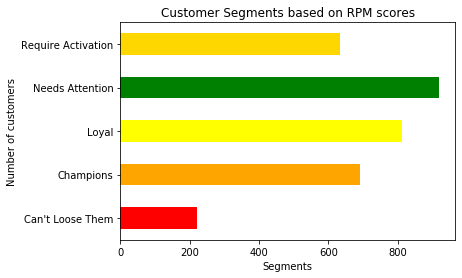

In [158]:
rfm_level_agg['Count'].plot(kind="barh", use_index=True, color=['red', 'orange', 'yellow', 'green', 'gold'])

plt.title("Customer Segments based on RPM scores")
plt.xlabel("Segments")
plt.ylabel("Number of customers")


## Final Conclusion

RFM is relatively simple technique that could drastically improve your marketing performance

# Reference 

1. https://www.moengage.com/blog/rfm-analysis-using-predictive-segments/
2. https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17